<a href="https://colab.research.google.com/github/sysyJEON/class_ai4ml/blob/main/ml_guide/ch05_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5장

## 5.1 회귀 소개

회귀
- 독립변수와 종속변수 간의 상관관계 모델링하는 기법
- 머신러닝 회귀 예측: 주어진 피처(독립변수)와 결정 값(종속변수) 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
- 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값

선형 회귀
- 실제 값과 예측값의 차이(오류의 제곱 값)르 최소화하는 직선형 회귀선을 최적화하는 방식
- 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉨
- 규제: 일반적인 선형 회귀의 과저합 문제를 해결하기 위해 회귀 계수에 패널티 값을 적용하는 것

대표적인 선형 회귀 모델
- 일반 선형 회귀
  - 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델
- 릿지(Ridge) 회귀
  - 선형 회귀에 L2 규제를 추가한 회귀 모델
  - L2 규제: 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
- 라쏘(Lasso) 회귀
  - 선형 회귀에 L1 규제를 적용
  - L1 규제: 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
  - L1 규제는 피처 선택 기능으로도 불림
- 엘라스틱넷(ElasticNet)
  - L2, L1 규제를 함께 결합한 모델
  - 주로 피처가 많은 데이터 세트에 적용됨
  - L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
- 로지스틱 회귀(Logistic Regression)
  - 분류에 사용되는 선형 모델
  - 매우 강려간 분류 알고리즘
  - 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류(텍스트 분류와 같은) 영역에서 뛰어난 에측 성능 보임

## 5.2 단순 선형 회귀를 통한 회귀 위해

- 단순 선형 회귀: 독립변수 하나, 종속변수 하나인 선형 회귀
- 잔차: 실제 값과 회귀 모델의 차이에 따른 오류 값
- 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미
- 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미

오류 합 계산 방식
- MAE(Mean Absolute Error): 절댓값 취해서 더하기
- RSS(Residual Sum of Suqre): 오류 값의 제곱을 구해서 더하기
- 일반적으로 미분 등의 계산 편리 위해 RSS 방식으로 오류 합 구함

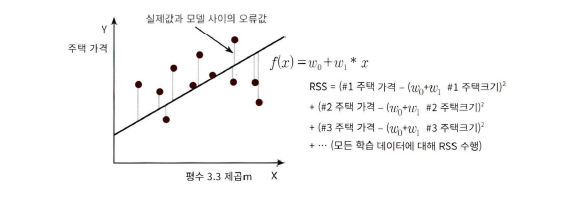

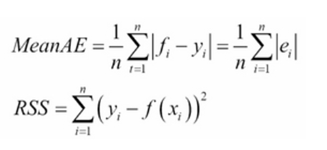

RSS
- 변수가 w0, w1인 식으로 표현
- RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해 찾는 것이 머신러닝 기반 회귀의 핵심 사항
- RSS에서 회귀 계수가 중심 변수임(독립변수와 조속변수는 중요 변수가 아니고, 상수로 간주)
- 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀)로 구성되는 RSS를 비용 함수라고 함
- 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반화하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것
- 비용 함수르 손실 함수(loss function)이라고도 함

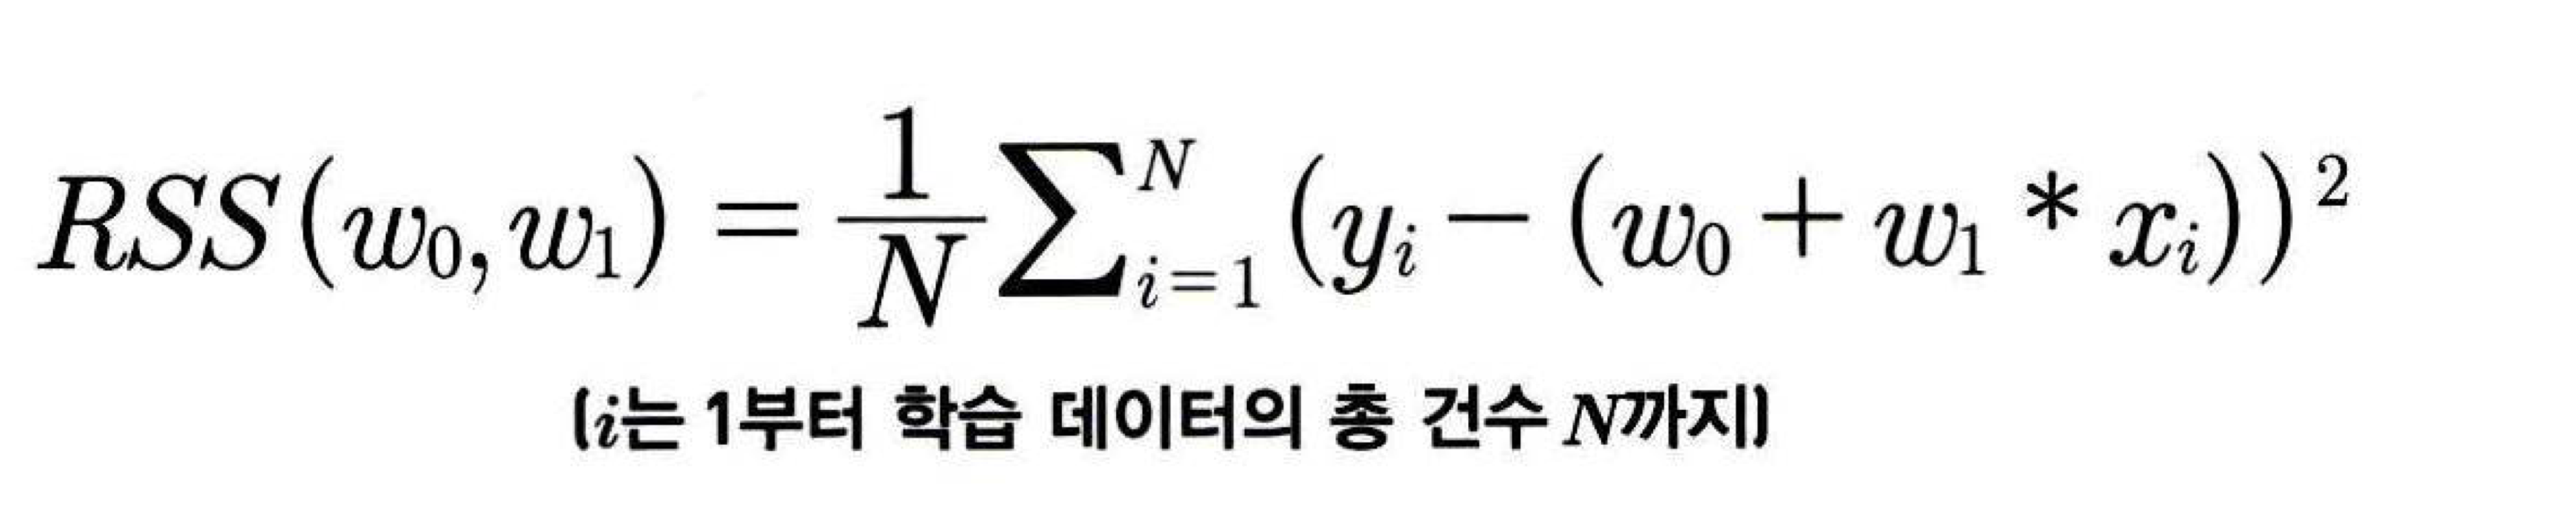

## 5.3 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

'점진적으로' 반복적인 계산을 통해 W 파라미터 값을 업데이트하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식

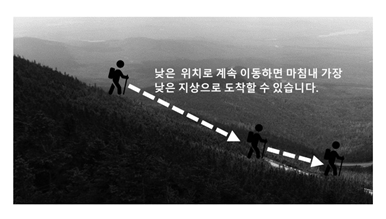

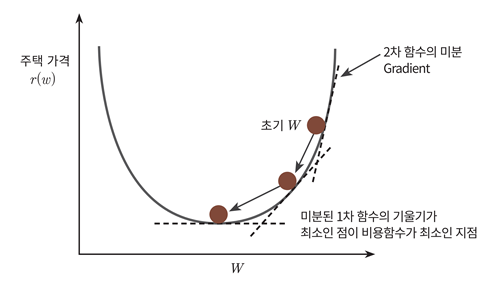

경사하강법 수식으로 정리
- 비용 함수 RSS(w0, w1) 편의상 R(w)로 지칭
- w0, w1 각 변수에 편미분 적용해 R(w)를 최소화하는 w0, w1을 구함

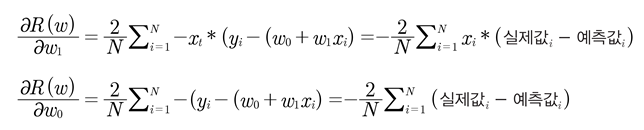

w1, w0의 편미분 결괏값을 반복적으로 보정하면서 w1, w0 값을 업데이트한다
- 업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스(-)하면서 적용
- 편미분 값이 너무 클 수 있기 때문에 보정 계수 곱하는데, 이는 '학습률'

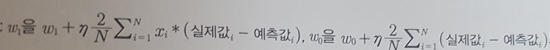

**실제값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

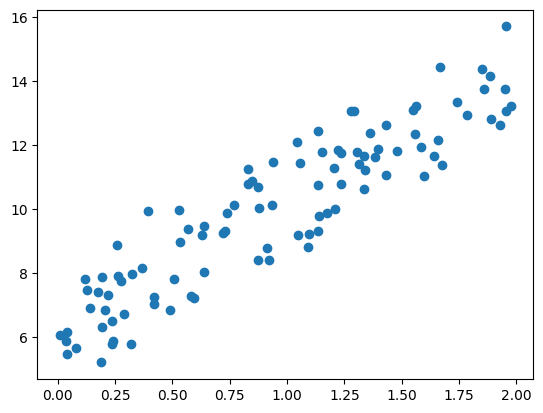

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

- 데이터는 y = 4X + 6 중심으로 무작위로 퍼져 있음

In [ ]:
X.shape, y.shape

((100, 1), (100, 1))

**비용 함수 정의**

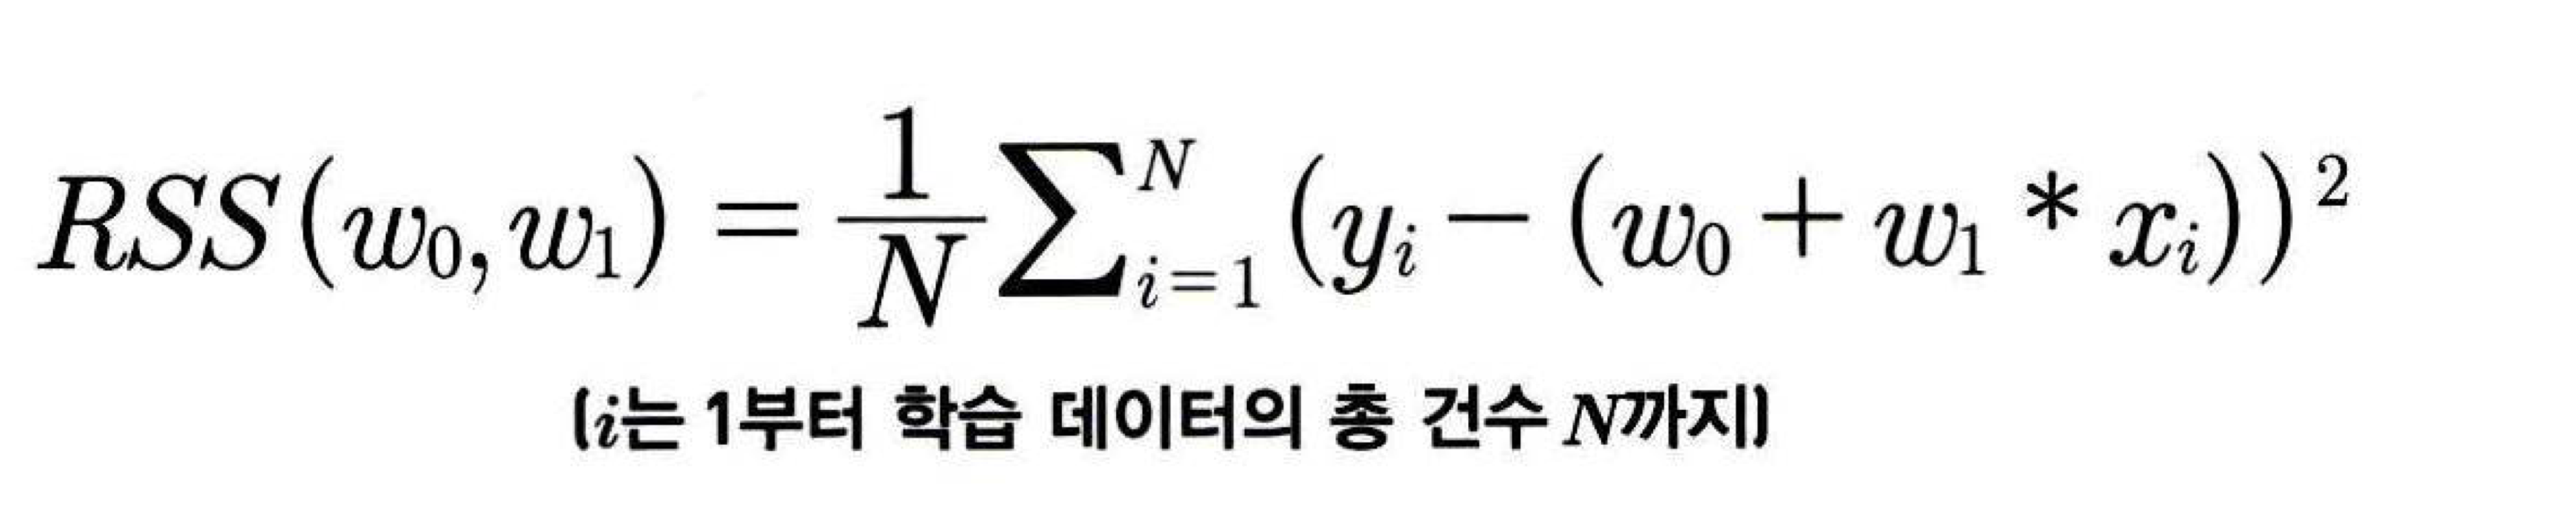

In [ ]:
def get_cost(y, y_pred):
  N= len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

**w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성**

* 예측 배열 y_pred는 np.dot(X, w1.T) + w0 임
100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)*w1 + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
* 새로운 w1과 w0를 update함
![](./image01.png)

In [ ]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0 # 입력 배열 X와 w1 배열의 내적
    diff = y-y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

    return w1_update, w0_update

In [ ]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [ ]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함.
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [ ]:
# 최종적으로 예측값과 실제값의 RSS 차이 계산
# 경사 하강법의 예측 오류 계산
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


- 실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출됨
- 예측 오류 비용은 약 0.9935

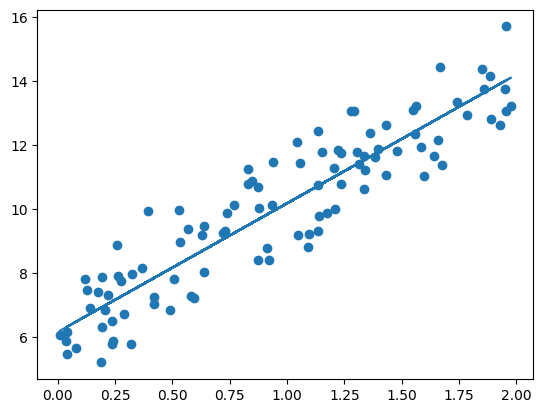

In [ ]:
plt.scatter(X, y)
plt.plot(X,y_pred)

경사하강법
- 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점
- 그래서 실전에서는 대부분 확률적 경사 하강법 이용

확률적 경사 하강법(Stochastic Gradient Descent)
- 전체 입ㄹ겨 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해 빠른 속도
- 대용량의 데이터 경우 대부분 확률적 경사 하강법이나 미니 배치 확률적 경사 하강법을 이용해 최적 비용함수를 도출

**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0

    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

In [ ]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))


w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


- 경사 하강법으로 구한 w1, w0과 큰 차이가 없음
- 예측 오류 비용 또한 아주 조금 높을 뿐, 예측 성능상 큰 차이 없음
- 따라서 큰 데이터 처리할 경우 확률적 경사 하강법 이용

피처가 여러 개인 경우
- 피처가 M개(X1, X2, ... , X100) 있다면 그에 따른 회귀 계수도 M+1 개로 도출됨

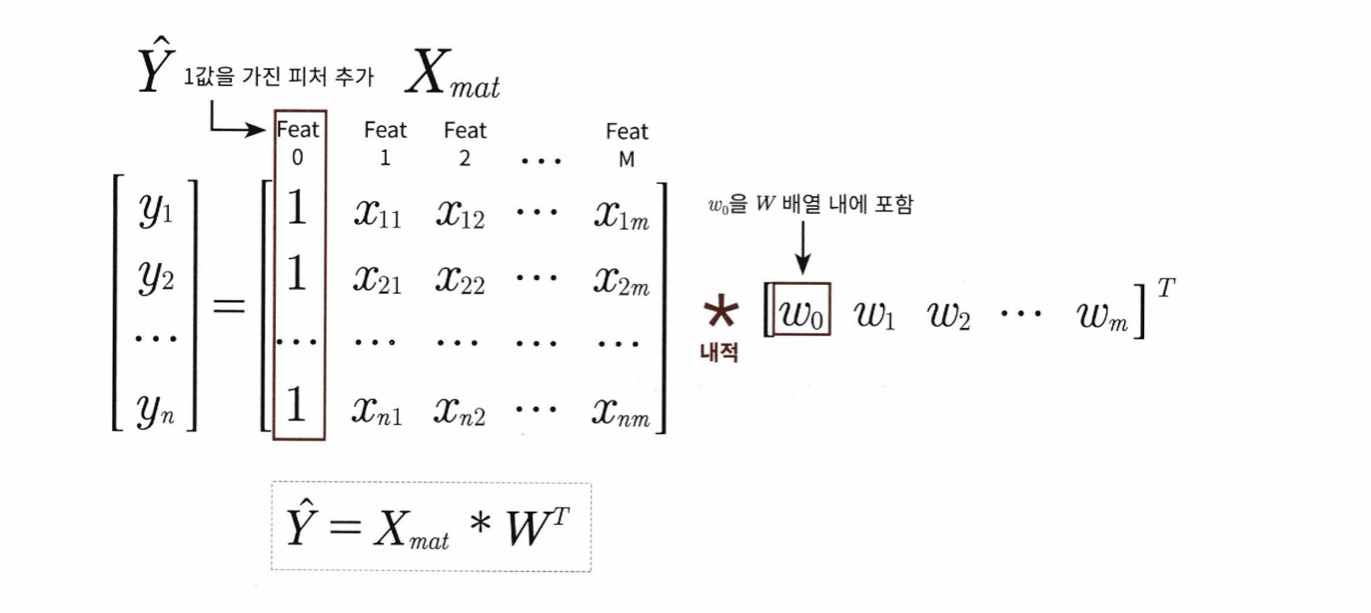

## 5.4 사이킷런 LinearRegression을 이용한 캘리포니아 주택 가격 예측

선형 모듈 중 규제가 적용되지 않은 선형 회귀를 사이킷런에서 구현한 클래스인 `LinearRegression`을 이용해 보스턴 주택 가격 예측 회귀 구현

### LinearRegression 클래스 - Ordinary Least Squares

- 예측값과 실제 값의 RSS(Residual Sum of Squaers)를 최소화해 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스
- `fit()` 메서드로 X, y 배열 입력받으면 회귀 계수(Coefficients)인 w를 `coef_` 속성에 저장

```
class sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
```

입력 파라미터
- `fit_intercept`: 불린 값으로 디폴트는 True.Intercept(적편) 값을 계산할지 말지 지정. False면 intercept가 사용 되지 않고 0으로 지정
- `normalize`: 불린 값으로 디폴트는 False. `fit_intercept`가 False이면 이 파라미터가 무시됨. True이면 회귀 수행 전 입력 데이터 세트를 정규화함

속성
- `coef_`: `fit()` 메서드 수행했을 때 회귀 계수가 배열 형태로 저장하는 속성. Shape는 (Target 값 개수, 피처 개수)
- `intercept_`: intercept 값

다중공선성(multi-collinearity) 문제
- 입력 피처 간의 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해짐
- 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제 적용
- 매우 많은 피처가 다중 공선성 문제 가진다면 PCA를 통해 차원 축소 수행하는 것도 고려

### 회귀 평가 지표

MAE(Mean Absolute Error)
- 실제 값과 예측값의 차이를 절댓값으로 변환해 평균
-
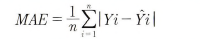

MSE(Mean Squared Error)
- 실제 값과 예측값의 차이를 제곱해 평균
- 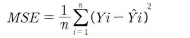


RMSE(Root Mean Squared Error)
- MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성 있으므로 MSE에 루트를 씌운 것
- 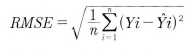

R^2
- 분산 기반으로 예측 성능 평가
- 실제 값의 분산 대비 예측값의 분산 비율을 지표로 함
- 1에 가까울수록 예측 정확도가 높음
- 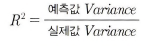

유의할 점
- `crossval_score`, `GridSearchCV` 같은 **Scoring 함수**에 회귀 평가 지표를 적용 할 때, `neg_`라는 접두어가 붙는데, Negative(음수)값을 가짐
- 사이킷런의 Scoring 함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하기 때문
- 오류 값이 작아야 좋은 모델이므로 평가 지표 값에 -1을 곱해서 보정해주는 것이 필요

### LinearRegression을 이용해 캘리포니아 주택 가격 회귀 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
# load_boston is deprecated so we will use fetch_california_housing instead
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# california housing 데이타셋 로드 - load_boston 대신 사용
housing = fetch_california_housing()

# california housing 데이타셋 DataFrame 변환
housingDF = pd.DataFrame(housing.data , columns = housing.feature_names)

# housing dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
housingDF['PRICE'] = housing.target
print('california housing 데이타셋 크기 :',housingDF.shape)
housingDF.head()

california housing 데이타셋 크기 : (20640, 9)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

In [ ]:
housingDF.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')


- MedInc: median income in block group
- HouseAge: median house age in block group
- AveRooms: average number of rooms per household
- AveBedrms: average number of bedrooms per household
- Population: block group population
- AveOccup: average number of household members
- Latitude: block group latitude
- Longitude: block group longitude

각 컬럼별로 주택가격에 미치는 영향도를 조사 - 시각화

- 시본(Seaborn)의 `regplot()` 함수: X, Y 축 값의 산점도와 함께 선형 회귀 직선 그려줌
- `matplotlib.subplots()`: 각 ax마다 칼럼과 PRICE의 관계 표현
  - 여러 개의 그래프를 한 번에 표현하기 위해 자주 사용됨
  - 인자 ncols는 열 방향으로 위치할 그래프 개수, nrows는 행 방향으로 위치할 그래프의 개수

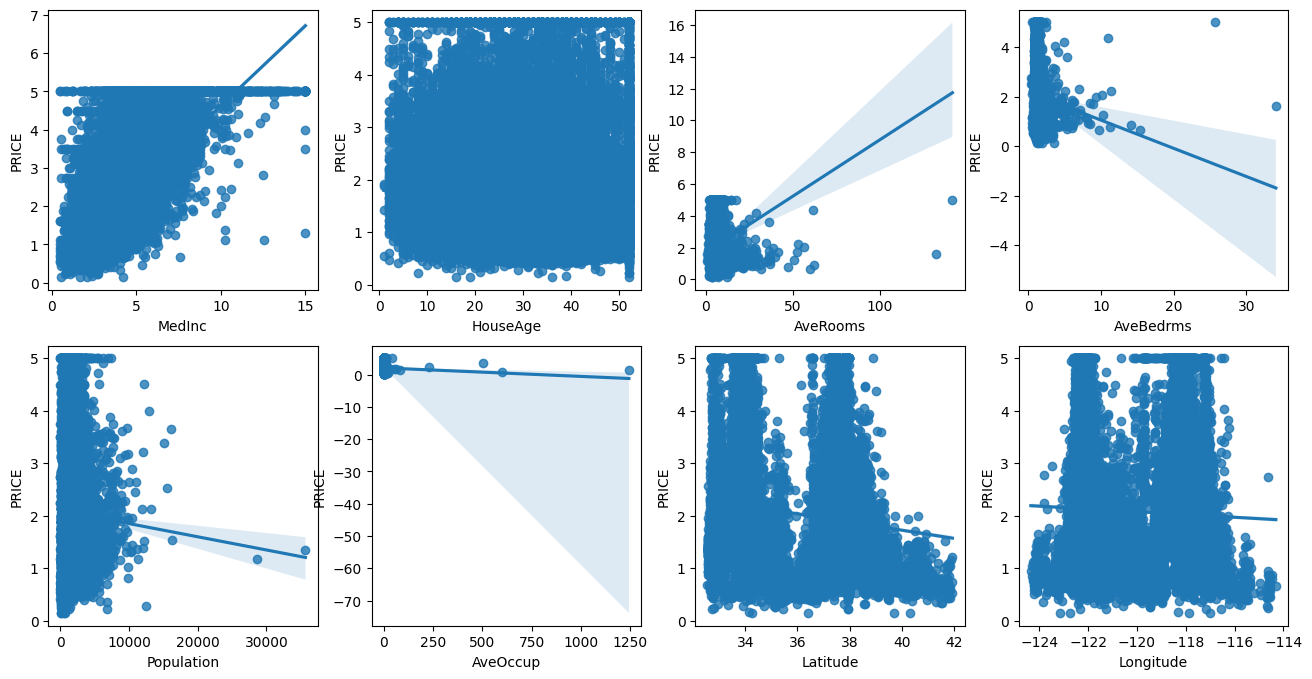

In [ ]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=housingDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('housing.tif', format='tif', dpi=300, bbox_inches='tight')

- 확연히 나타나는 선형성 없음
- 모르겠는뎁쇼?

**학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 0.543 , RMSE : 0.737
Variance score : 0.595


In [ ]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: -37.23905305294164
회귀 계수값: [ 0.4  0.  -0.1  0.6 -0.  -0.  -0.4 -0.4]


`coer_` 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑하고, 높은 값 순으로 출력

In [ ]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AveBedrms     0.6
MedInc        0.4
HouseAge      0.0
Population   -0.0
AveOccup     -0.0
AveRooms     -0.1
Latitude     -0.4
Longitude    -0.4
dtype: float64

- 크거나 작은 회귀 계수가 없음...

5개의 폴드 세트에서 `cross_val_score()` 이용해 교차 검증으로 MSE와 RMSE 측정
- 회귀는 MSE 값 낮을수록 좋은 모델이기 때문에 `scoring='neg_mean_squared_error'` 계산된 MSE 값에 -1 곱해서 반환
- RMSE 제공하지 않으므로 MSE값에 넘파이의 `sqrt()`함수 적용해서 구함

In [ ]:
from sklearn.model_selection import cross_val_score

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # -1 곱하고 sqrt 해줌
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 folds 의 개별 Negative MSE scores:  [-0.48 -0.62 -0.65 -0.54 -0.49]
 5 folds 의 개별 RMSE scores :  [0.7  0.79 0.8  0.74 0.7 ]
 5 folds 의 평균 RMSE : 0.746 


## 5.5 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

다항(Polynomial) 회귀
- 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
- y = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^2 + w_5w_2^2
- 비선형 회귀가 아닌 선형 회귀
- 선형/비선형 나누는 기준은 회귀 계수가 선형/비선형이지에 따른 것이지 독립변수의 선형비선형 여부와는 무관


`PolynomialFeatures` 클래스
- 사이킷런은 다항 회귀 위한 클래스 명시적으로 제공하지 않음
- 비선형 함수를 선형 모델에 적용시키는 방법으로 구현
- `PolynomialFeatures` 클래스로 피처를 Polynomial(다항식) 피처로 변환
- `degree` 파라미터로 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환
- `fit()`, `transform()` 메서드로 변환 작업 수행

PolynomialFeatures 클래스로 다항식 변환
- 단항값 [x_1, x_2]를 2차 다항값 [1, x_1, x_2, x_1^2, x_1x2, x_2^2]로 변환

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성. 즉 회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [ ]:
def polynomial_func(X): # 3차 다항 계수 피처 값이 입력되면 결정 값 반환
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2) # 다항식으로 변환한 단항식 생성

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습
- `degree=3`: 단항 계수 피처 [x_1, x_2]를 3차 다항 계수 [1, x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, x_1^2x_2, x_1x_2^2, x_1^3]와 같이 10개의 다항 계수로 변환

In [ ]:
# 3 차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


**사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습**  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.
- 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 사이킷런의 `Pipeline` 객체 이용해 한 번에 다항 회귀 구현하는 것이 명료

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀의 차수(degree) 높일수록 학습 데이터에만 너무 맞춘 학습 이뤄져서 테스트 데이터 환경에서 오히려 예측 정확도 떨어짐
- 차수가 높아질수록 과적합 문제 크게 발생

예제 소스 코드
- 피처 X와 target y가 잡음(Noise) 포함된 다항식의 코사인(Cosine) 그래프 관계를 가지도록 만들어줌
- 이에 기반해 다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 정확도 비교
- 학습데이터는 30개의 임의 데이터 X와, X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성됨

**cosine 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만듬**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

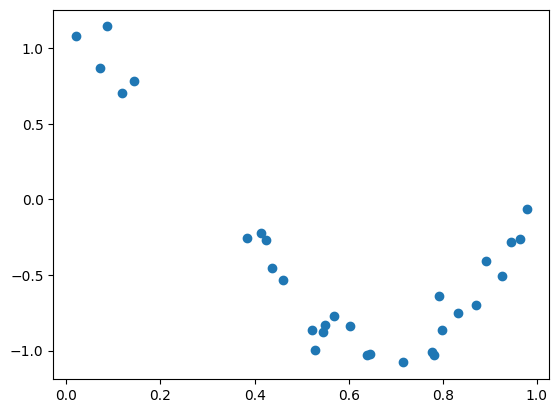

In [ ]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04320874987231984 입니다.

Degree 15 회귀 계수는 [-2.98292000e+03  1.03899030e+05 -1.87415569e+06  2.03715733e+07
 -1.44873019e+08  7.09314439e+08 -2.47065589e+09  6.24560814e+09
 -1.15676513e+10  1.56894997e+10 -1.54006135e+10  1.06457374e+10
 -4.91378181e+09  1.35919862e+09 -1.70381101e+08] 입니다.
Degree 15 MSE 는 182029801.572586 입니다.


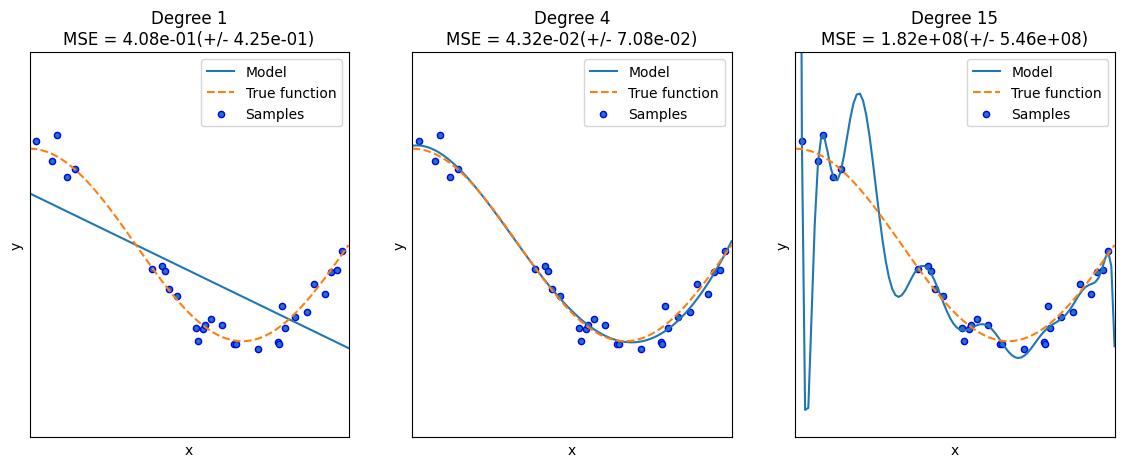

In [ ]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)

    # 교차 검증(cross_val_score())으로 다항 회귀를 평가합니다.(MSE 값)
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- Degree 1: 너무 단순. 과소 적합. MSE 약 0.41
- Degree 4: 실제 데이터 세트와 유사. 잘 예측한 모델. MSE 약 0.04로 가장 뛰어난 예측 성능
- Degree 15: 데이터 세트의 변동 잡음값까지 지나치게 반영. 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과 완전히 다른 혀애. 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델. MSE 182581084.83 정도로 너무 큼

### 편향-분산 트레이드오프(Bias-Variance Trade off)

- Degree 1: 매우 단순한 모델, 지나치게 한 방향성으로 치우친 경향, 고편향(High Bias)성
- Degree 15: 매우 복잡한 모델, 지나치게 높은 변동성, 고분산(High Variance)성
- 높은 편향/낮은 분산 -> 과소적합, 낮은 편향/높은 분산 -> 과적합
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델 구축이 가장 효율적인 머신러닝 예측 모델

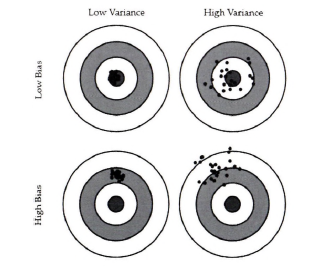

## 5.6 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

### 규제 선형 모델의 개요

- 회귀 모델은 적절히 데이터에 적합하면서도 회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함
- 비용함수는 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화 방법과 과적합 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

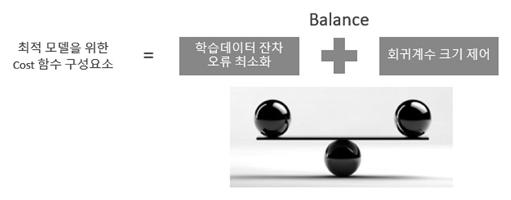

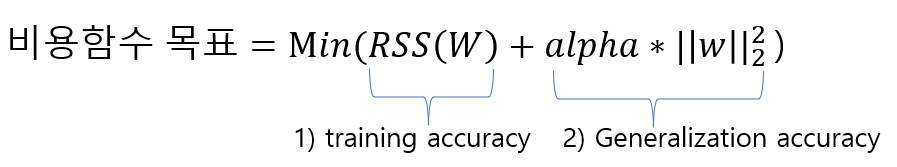

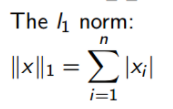

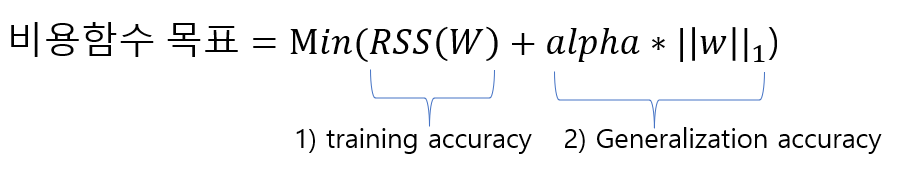

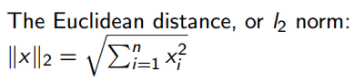

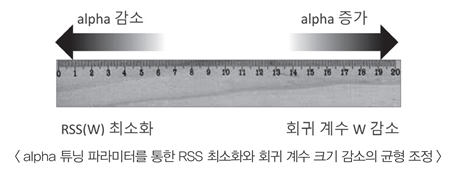

- alpha: 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어 수행하는 튜닝 파라미터
- alpha 값 크게 -> 회귀 계수 W 값 작게 해 과적합 개선
- alpha 값 작게 -> 회귀 계수 W 값 커져도 어느 정도 상쇄 가능
- alpha를 0에서부터 지속적으로 값을 증가시키면 회귀 계수 값의 크기를 감소시킬 수 있음
- 비용 함수에 alpha 값으로 패널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선 <=> 규제(Regularization)

규제
- L2 규제: W의 제곱에 대해 패널티 부여 => 릿지(Ridge) 회귀
- L1 규제: W의 절댓값에 패널티 부여 => 라쏘(Lasso) 회귀
- L1 규제 적용하면 영향력이 크지 않은 회귀 계수 값을 0으로 변환

### 릿지 회귀

`Ridge` 클래스
- 주요 생성 파라미터: alpha

In [ ]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing
import pandas as pd

# california housing 데이타셋 로드 - load_boston 대신 사용
housing = fetch_california_housing()
# california housing 데이타셋 DataFrame 변환
housingDF = pd.DataFrame(housing.data , columns = housing.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함.
housingDF['PRICE'] = housing.target

y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # -1 곱해주기
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-0.484 -0.623 -0.646 -0.544 -0.494]
 5 folds 의 개별 RMSE scores :  [0.695 0.789 0.804 0.737 0.703]
 5 folds 의 평균 RMSE : 0.746 


**alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정**

In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 1 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 10 일 때 5 folds 의 평균 RMSE : 0.746 
alpha 100 일 때 5 folds 의 평균 RMSE : 0.746 


**각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성**

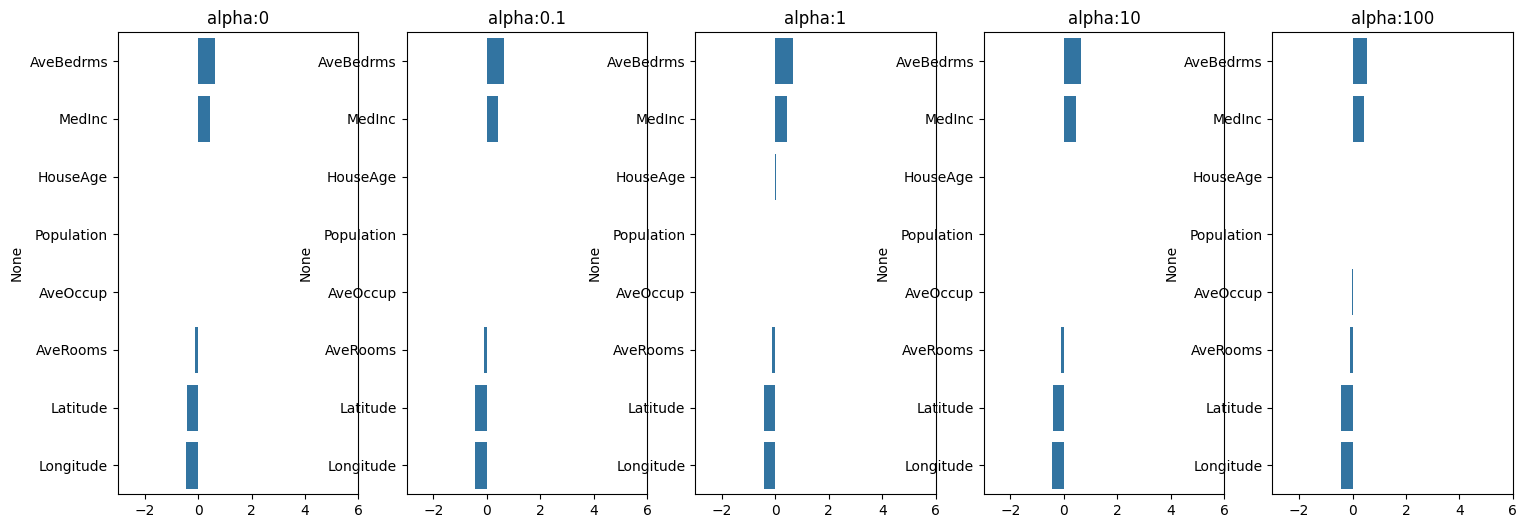

In [ ]:
import seaborn as sns
from scipy import stats

# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()



**alpha 값에 따른 컬럼별 회귀계수 출력**

In [ ]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

alpha:0  alpha:0.1   alpha:1  alpha:10  alpha:100
AveBedrms   0.645066   0.644965  0.644062  0.635174   0.558249
MedInc      0.436693   0.436683  0.436594  0.435719   0.428210
HouseAge    0.009436   0.009436  0.009437  0.009452   0.009592
Population -0.000004  -0.000004 -0.000004 -0.000004  -0.000003
AveOccup   -0.003787  -0.003787 -0.003786 -0.003785  -0.003773
AveRooms   -0.107322  -0.107303 -0.107133 -0.105456  -0.091012
Latitude   -0.421314  -0.421313 -0.421299 -0.421156  -0.419061
Longitude  -0.434514  -0.434511 -0.434485 -0.434217  -0.430993

- alpha 값 증가하면서 회귀 계수가 지속적으로 작아짐
- 하지만 릿지 회귀의 경우에 회귀 계수를 0으로 만들지는 않음

### 라쏘 회귀

- L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거함
- L1 규제는 적절한 피처만 회귀에 포함시키는 피처 선택의 특성을 가짐

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True): # 인자로 회귀 모델 이름, alpha값 리스트, 피처 데이터 세트, 타겟 데이터 세트 입력 받음
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df
# end of get_linear_regre_eval

In [ ]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target) # 모델명 'Lasso'

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.784 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.813 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.873 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.000 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171 


alpha 값에 따른 피처별 회귀 계수

In [ ]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
MedInc        0.387057   0.390583   0.288855  0.145469  0.000000
HouseAge      0.013391   0.015082   0.012031  0.005815  0.000000
Population    0.000010   0.000018   0.000012 -0.000006 -0.000023
AveRooms     -0.000000  -0.000000   0.000000  0.000000  0.000000
AveBedrms     0.000000   0.000000  -0.000000 -0.000000 -0.000000
AveOccup     -0.003409  -0.003323  -0.000000 -0.000000 -0.000000
Longitude    -0.204689  -0.099225  -0.000000 -0.000000 -0.000000
Latitude     -0.212806  -0.114214  -0.000000 -0.000000 -0.000000

- alpha 크기가 증가함에 따라 일부 피처의 회귀 계수는 아예 0으로 바뀜
- 회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻을 수 있음

### 엘라스틱넷 회귀

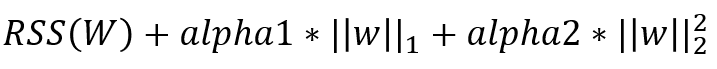

- L2 규제와 L1 규제를 결합한 회귀
- 라쏘 회귀가 서로 상관관계 높은 피처들의 경우에 이들 중에서 중요 피처만 셀랙션하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향으로 alpha 값에 따라 회귀 계수의 값이 극격히 변동함
- 이를 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것
- 단점은 수행시간이 상대적으로 오래 걸림

`ElasticNet` 클래스
- 주요 생성 파라미터: `alpha`, `l1_ratio`
- ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha 값과 다름
- 엘라스틱넷의 규제: aL1 + bL2
- a는 L1 규제의 alpha 값, b는 L2 규제의 alpha 값
- ElasticNet 클래스의 alpha 파라미터 값은 a+b
- ElasticNet 클래스의 l1_ratio 파라미터 값은 a/(a+b)
- l1_ratio = 0 -> a가 0이므로 L2 규제와 동일
- l1_ratio = 1 -> b가 0이므로 L1 규제와 동일

In [ ]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정 <- get_linear_reg_eval() 함수에서 단순히 alpha 값의 변화만 살피기 위해
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 0.773 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.788 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 0.855 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.931 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.171 


In [ ]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

alpha:0.07  alpha:0.1  alpha:0.5   alpha:1   alpha:3
MedInc        0.384500   0.385980   0.318532  0.213455  0.000000
HouseAge      0.012534   0.013697   0.013662  0.009156  0.000000
Population    0.000007   0.000012   0.000018  0.000003 -0.000023
AveRooms      0.000000  -0.000000   0.000000  0.000000  0.000000
AveBedrms     0.000000   0.000000  -0.000000 -0.000000 -0.000000
AveOccup     -0.003502  -0.003437  -0.000837 -0.000000 -0.000000
Longitude    -0.259559  -0.185737  -0.000000 -0.000000 -0.000000
Latitude     -0.264115  -0.195109  -0.000000 -0.000000 -0.000000

### 선형 회귀 모델을 위한 데이터 변환

선형 모델은 일반적으로 피처와 타깃값 간 선형 관계 가정하고 정규분포 형태 선호
- 특히 타깃값은 왜곡(Skew)된 형태의 분포도 경우 부정적인 영향, 피처값도 마찬가지
- 모델 적용 전 데이터에 대한 스케일링/정규화 작업 수행

피처 데이터 세트에 적용하는 변환 작업
- `StandardScaler` 클래스: 평균 0, 분산 1인 표준 정규 분포 세트로 변환
- `MinMaxScaler` 클래스: 최솟값 0, 최댓값 1인 값으로 정규화
- 스켕일링/정규화 수행한 데이터에 다시 다항 특성 적용하여 변환
- 로그 변환(Log Transforamteion): 원래 값에 log 함수 적용하면 정규 분포에 가까운 형태로 값이 분포됨. 많이 사용되는 변환 방법

타깃값 변환
- 로그 변환 적용


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        # Check for non-positive values and handle them (e.g., replace with a small positive value)
        input_data[input_data <= 0] = 1e-8  # Replace non-positive values with a small number
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)

    return scaled_data

Ridge 클래스의 alpha값 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변환한 데이터 세트를 입력받을 경우 RMSE 값 변화 살펴보기

In [ ]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
# 변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)

(20640, 8) (20640, 8)

## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746 
(20640, 8) (20640, 8)

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.746 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.746 
(20640, 44) (20640, 8)

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 3.323 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 2.850 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.314 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.719 
(20640, 8) (20640, 8)

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.745 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.748 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 0.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 0.816 
(20640, 44) (20640, 8)

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 0.726 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 0.742 
alpha 10일 때 5 폴드 

- 다항식 변환은 피처의 개수가 많을 경우 적용 힘들며 시간 소모
- 일반적으로 선형 회귀 적용하려는 데이터 세트에 데이터 값의 분포가 심하게 왜곡되어 있을 경우 로그 변환 적용하는 것이 좋음

## 5.7 로지스틱 회귀

로지스틱 회귀
- 선형 회귀 방식을 분류에 적용한 알고리즘
- 선형 회귀 계열: 선형/비선형은 독립변수가 아닌 가중치(weight) 변수가 선형인지 아닌지 따름
- 학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아니라 시그모이드(Sigmoid) 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 다라 분류를 결정하는 것

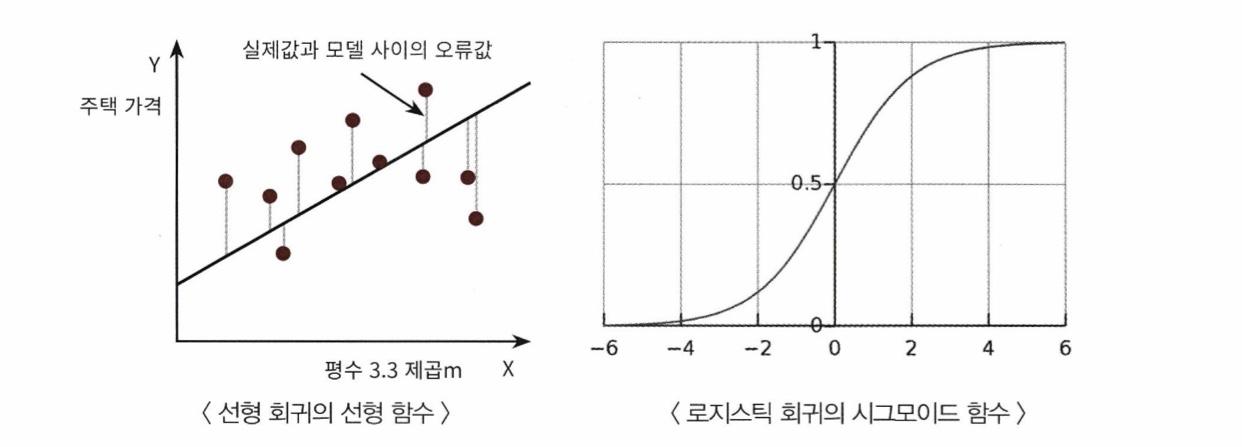

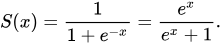

사이킷런의 `LogisticRegression` 클래스를 이용해 위스콘신 유방암 데이터 세트 기반 로지스틱 회귀로 암 여부 판단

In [40]:
# 전체 데이터 세트 생성
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [41]:
# 정규 분포 형태의 표준 스케일링 적용한 뒤 데이터 세트 분리
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

`solver` 값 `lbfgs`로 설정하고 `LogisticRegression` 학습 및 성능 평가

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 로지스틱 회귀를 이용하여 학습 및 예측 수행.
# solver인자값을 생성자로 입력하지 않으면 solver='lbfgs'
lr_clf = LogisticRegression() # solver='lbfgs'
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

# accuracy와 roc_auc 측정
print('accuracy: {0:.3f}, roc_auc:{1:.3f}'.format(accuracy_score(y_test, lr_preds),
                                                 roc_auc_score(y_test , lr_preds_proba)))

accuracy: 0.977, roc_auc:0.995


서로 다른 `solver` 값으로 `LogisticRegression` 학습하고 성능 평가

- lbfgs: 버전 0.22부터 기본 설정값. 메모리 공간 절약, CPU 코어 수 많으면 최적화를 병렬로 수행 가능
- liblinear: 0.21까지 기본. 다차원이고 작은 데이터 세트에서 효과적으로 동작하지만 국소 최적화(Local Minimum)이슈 있고 병렬 최적화 불가
- newton-cg: 정교환 최적화 가능하지만 대용량 데이터에서 속도가 많이 느림
- sag: Stochastic Average Gradient, 경사 하강법 기반 최적화 적용. 대용량 데이터에서 빠르게 최적화
- saga: sag와 유사한 최적화 방식이며 L1 정규화 가능

In [43]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
# 여러개의 solver값 별로 LogisticRegression 학습 후 성능 평가
for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    lr_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:, 1]

    # accuracy와 roc_auc 측정
    print('solver:{0}, accuracy: {1:.3f}, roc_auc:{2:.3f}'.format(solver,
                                                                  accuracy_score(y_test, lr_preds),
                                                                  roc_auc_score(y_test , lr_preds_proba)))

solver:lbfgs, accuracy: 0.977, roc_auc:0.995
solver:liblinear, accuracy: 0.982, roc_auc:0.995
solver:newton-cg, accuracy: 0.977, roc_auc:0.995
solver:sag, accuracy: 0.982, roc_auc:0.995
solver:saga, accuracy: 0.982, roc_auc:0.995


- liblinear와 sag, saga 성능 수치가 약가 높지만 데이터 세트가 워낙 작아서 큰 차이 없음

`GridSearchCV` 이용해 `solver`, `penalty`, `C` 최적화
- `penalty`: 규제(Regularizatiln) 유형 설정, `l2`, `l1`(기본은 `l2`)
- `C`: 규제 강도 조절하는 `alpha` 값의 역수
- L1, L2 규제는 `solver` 설정에 영향 받음
  - `Liblinear`, `saga` 경우 L1, L2 규제 모두 가능
  - `lbfgs`, `newton-cg`, `sag` 경우 L2 규제만 가능

In [44]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'lbfgs'],
        'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 최적 평균 정확도:0.979


## 5.8 회귀 트리

- 일반적인 선형 회귀: 회귀 계수를 선형으로 결합하는 "회귀 함수"를 구해, 여기에 독립변수를 입력해 결괏값을 예측하는 것
- 회귀 트리: 회귀 함수를 기반으로 하지 않고, 결정 트리와 같이 "트리를 기반"으로 하는 회귀 방식

회귀 트리
- 회귀를 위한 트리 생성
- 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리와 차이가 있음
  - 분류 트리: 특정 클래스 레이블을 결정
  - 회귀 트리: 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산

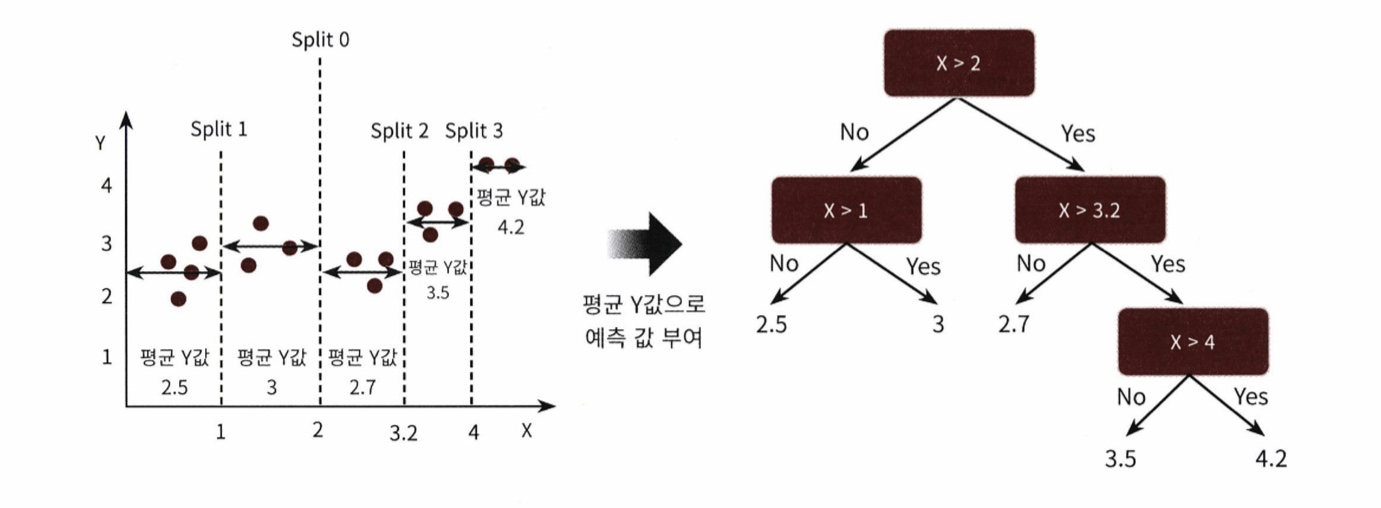

- 사이킷런에서 결정 트리, 랜덤 포레스트, GBM에서 CART(Classification And Regression Trees) 기반의 회귀 수행 할 수 있는 Estimator 클래스 제공
- XGBoost, LightGBM도 사이킷런 래퍼 클래스 통해 제공

사이킷런의 랜덤 포레스트 회귀 트리인 `RandomForestRegressor`로 캘리포니아 주택 예측 수행

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거

# california housing 데이타셋 로드 - load_boston 대신 사용
housing = fetch_california_housing()

# california housing 데이타셋 DataFrame 변환
housingDF = pd.DataFrame(housing.data , columns = housing.feature_names)

housingDF['PRICE'] = housing.target
y_target = housingDF['PRICE']
X_data = housingDF.drop(['PRICE'], axis=1,inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


 5 교차 검증의 개별 Negative MSE scores:  [-0.52 -0.34 -0.37 -0.44 -0.46]
 5 교차 검증의 개별 RMSE scores :  [0.72 0.59 0.61 0.66 0.68]
 5 교차 검증의 평균 RMSE : 0.651 


In [47]:
# 입력 모델과 데이터 세트 입력받아 교차 검증으로 평균 RMSE 계산하는 함수
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

#####  DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.809 
#####  RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651 
#####  GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.627 
#####  XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 0.677 
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.164930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.034871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead 

모델의 피처별 중요도 시각화
- 회귀 트리 Regressor 클래스는 선형 회귀와 다른 처리 방식이므로 회귀 계수 제공하는 `coef_` 속성 없음
- 대신 `feature_importances_`로 피처별 중요도 알 수 있음

<Axes: xlabel='None', ylabel='None'>

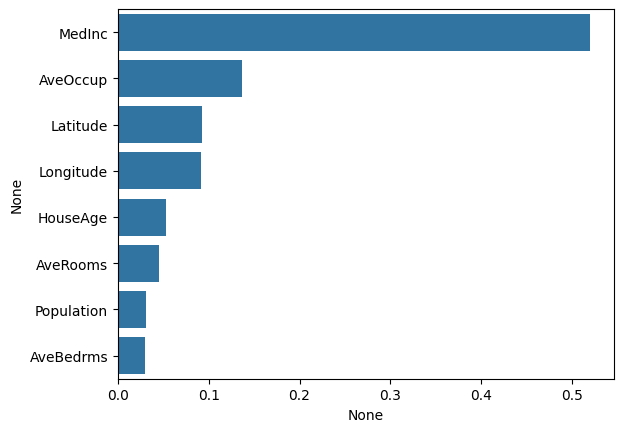

In [49]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


회귀 트리 Regressor가 어떻게 예측값 판단하는지 선형 회귀와 비교해 시각화
- 결정 트리 하이퍼 파라미터인 `max_depth` 크기 변화시키면서 예측 변화 살펴보기
- 2차원 평면상에서 회귀 예측선 쉽게 표혀하기 위해 단 1개의 변수만 추출
- 피처 중요도 높은 `MedInc` 칼럼만 이용해 선형 회귀와 결정 트리 회귀로 PRICE 예측 회귀선 표현

(100, 2)


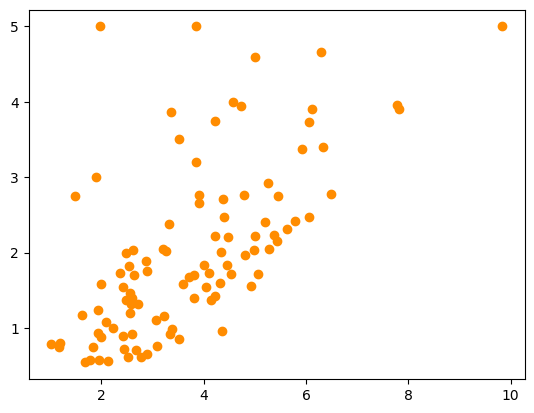

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

housingDF_sample = housingDF[['MedInc','PRICE']]
housingDF_sample = housingDF_sample.sample(n=100,random_state=0)
print(housingDF_sample.shape)
plt.figure()
plt.scatter(housingDF_sample.MedInc , housingDF_sample.PRICE,c="darkorange")

`LinearRegression`과 `DecisionTreeRegressor`를 `max_depth` 2, 7로 학습

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 1 ~ 10 까지 100개 데이터 셋 생성.
X_test = np.arange(1, 10, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = housingDF_sample['MedInc'].values.reshape(-1,1)
y_target = housingDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)


학습된 Regressor에서 예측한 Price 회귀선 그리기

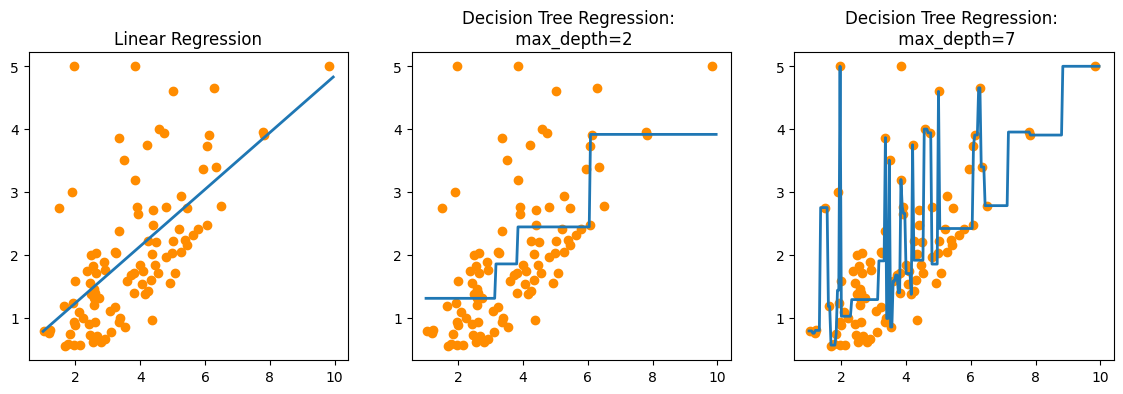

In [59]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 1 ~ 10로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(housingDF_sample.MedInc, housingDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)

- 선형 회귀는 직선으로 예측 회귀선 표현
- 회귀 트리는 분활되는 데이터 지점에 따라 브랜치 만들면서 계단 형태의 회귀선
  - 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선 만들어 과적합 되기 쉬운 모델이 됨